In [1]:
from sklearn.cluster import KMeans
import numpy as np
import nsepy
import datetime
import ta
import pandas as pd
from pandas_datareader import data
import random

In [2]:
X=pd.read_csv('bob.csv')
X

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-02,134.020004,130.669998,134.020004,133.639999,621765.0,82.026894
1,2012-01-03,140.979996,134.389999,134.389999,140.050003,1308700.0,85.961281
2,2012-01-04,142.000000,138.259995,140.979996,140.210007,1515265.0,86.059494
3,2012-01-05,141.570007,137.729996,140.399994,138.919998,2718015.0,85.267693
4,2012-01-06,141.000000,136.639999,137.000000,140.449997,923805.0,86.206802
...,...,...,...,...,...,...,...
1881,2019-08-26,99.900002,91.500000,99.900002,95.050003,43374486.0,95.050003
1882,2019-08-27,99.199997,96.650002,97.000000,97.300003,35349172.0,97.300003
1883,2019-08-28,97.650002,93.750000,97.199997,94.500000,24947200.0,94.500000
1884,2019-08-29,96.000000,91.349998,94.000000,91.800003,28470571.0,91.800003


In [3]:
def data1():
    X=pd.read_csv('bob.csv')
    X['c-o']=(X.Close-X.Open)/X.Open*100
    X['candle']=np.where(X['c-o'].values<-2,0,np.where(X['c-o'].values<-1,1,np.where(X['c-o'].values<0,2,np.where(X['c-o'].values<1,3,np.where(X['c-o'].values<2,4,5)))))
    X['rsi']=ta.momentum.rsi(X["Close"], window=14, fillna=False)
    X['r']=ta.momentum.williams_r(X["High"], X["Low"], X["Close"], lbp=14, fillna=False)
    X['cci']=ta.trend.cci(X["High"], X["Low"], X["Close"], window=20, constant=0.015, fillna=False) 
    X = X.reset_index()
    X['cash']=0
    X['action']=""
    X['action1']=""
    return X

In [4]:
X=data1()
X

,index,Date,High,Low,Open,Close,Volume,Adj Close,c-o,candle,rsi,r,cci,cash,action,action1
0,0,2012-01-02,134.020004,130.669998,134.020004,133.639999,621765.0,82.026894,-0.283543,2,NaN,NaN,NaN,0,,
1,1,2012-01-03,140.979996,134.389999,134.389999,140.050003,1308700.0,85.961281,4.211626,5,NaN,NaN,NaN,0,,
2,2,2012-01-04,142.000000,138.259995,140.979996,140.210007,1515265.0,86.059494,-0.546169,2,NaN,NaN,NaN,0,,
3,3,2012-01-05,141.570007,137.729996,140.399994,138.919998,2718015.0,85.267693,-1.054128,1,NaN,NaN,NaN,0,,
4,4,2012-01-06,141.000000,136.639999,137.000000,140.449997,923805.0,86.206802,2.518246,5,NaN,NaN,NaN,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,1881,2019-08-26,99.900002,91.500000,99.900002,95.050003,43374486.0,95.050003,-4.854853,0,36.397844,-66.459615,-99.985732,0,,
1882,1882,2019-08-27,99.199997,96.650002,97.000000,97.300003,35349172.0,97.300003,0.309281,3,40.422755,-52.484458,-55.649092,0,,
1883,1883,2019-08-28,97.650002,93.750000,97.199997,94.500000,24947200.0,94.500000,-2.777775,0,37.262534,-69.875783,-95.442150,0,,
1884,1884,2019-08-29,96.000000,91.349998,94.000000,91.800003,28470571.0,91.800003,-2.340422,0,34.464500,-84.191163,-125.121217,0,,


Populating the interactive namespace from numpy and matplotlib


c:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


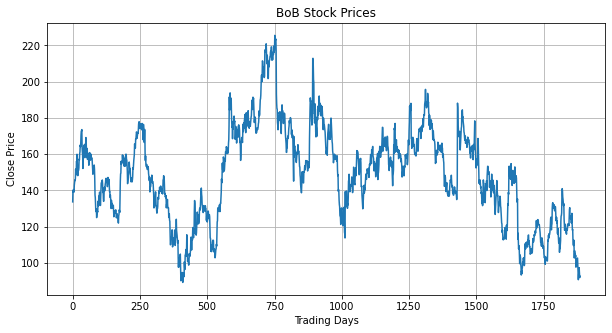

In [5]:
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('pylab', 'inline')
fig = plt.figure()
ax=X.loc[:,'Close'].plot(grid="True",figsize=(10,5), title='BoB Stock Prices')
ax.set_xlabel("Trading Days")
ax.set_ylabel("Close Price")
plt.show()

In [6]:
def tech(X1,t):
    ls=[0,0,0]
    #0-hold 1-buy 2-sell
    rsi=X1['rsi'][:t+1]
    if(rsi[t]>=70):
        ls[0]=2
    elif (rsi[t]<=30):
         ls[0]=1
    else:
         ls[0]=0
    r=X1['r'][:t+1]
    if(r[t]>=-20):
        ls[1]=2
    elif (r[t]<=-80):
         ls[1]=1
    else:
         ls[1]=0
    cci=X1['cci'][:t+1]
    if(cci[t]<=-100):
        ls[2]=2
    elif (cci[t]>=100):
         ls[2]=1
    else:
         ls[2]=0
    return ls

In [7]:

def getState(t):    
    return(X['candle'][t]) 

In [8]:
class Agent:
    def __init__(self):
        self.gamma = np.load('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TRAINING\Gamma/gamma200.npy')
        self.Q = np.load('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TRAINING\Qtable/Qtable200.npy')
        self.learning_rate=np.load('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TRAINING\Learning_Rate/learning_rate200.npy')
        self.epsilon = np.load('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TRAINING\Epsilon/epsilon200.npy')
        
        
    def getAction(self,state):
        a=[1,0,2]
        if np.random.rand() <= self.epsilon:
            return random.choice(a)
        return np.argmax(self.Q[state,])  
    
    # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
    def update(self,state,action,reward,next_state,next_action):
            self.Q[state,action]= self.Q[state,action] + self.learning_rate * (reward + self.gamma * np.max(self.Q[next_state, :])
                                                                - self.Q[state,action])


In [9]:
episode_count=1
agent=Agent()
agent.Q
m1=0
m2=0
for e in range(1,episode_count+1):
    X=data1()
    
    
    data_length_start=1420
    data_length=1844
    state = getState(data_length_start)
    action = agent.getAction(state)
    last_action=None
    last_price=0
    last_quantity=0
    capital=X.loc[data_length_start,'Open']*100
    margin=X.loc[data_length_start,'Open']*100
    brok_rate=0.0010
    profit=0    
    print("Episod {}/{}".format(e,episode_count))
    count=0
    for t in range(data_length_start,data_length-1):
        z=tech(X,t)
        z0=z.count(0)
        z1=z.count(1)
        z2=z.count(2)
        y=[z0,z1,z2]
        z3=y.index(max(y))
        #print('t',t)        
        reward=0
        if last_action=='sold':
            tbrokerage=(X.loc[t,'Close']+last_price)*brok_rate
            tprofit=(last_price-X.loc[t,'Close'])*last_quantity
            tprofit1=(tprofit/(last_price*last_quantity))*100
            
            if tprofit1<-10:
                profit=profit+tprofit
                margin=margin+(last_quantity*last_price)+(tprofit)
                X.loc[t,'cash']=margin      
                #print('close short stop loss @',X['Open'].iloc[t])
                last_action=None
                X.loc[t,'action']="close short"
                X.loc[t,'action1']="long"
                reward= max((np.log(last_price)-np.log(X.loc[t,'Close'])),0)
        elif last_action=='bought':
            tbrokerage=(X.loc[t,'Close']+last_price)*brok_rate
            tprofit=(X.loc[t,'Close']-last_price)*last_quantity
            tprofit1=(tprofit/(last_price*last_quantity))*100
            if tprofit1<-10:
                profit=profit+tprofit
                margin=margin+(last_quantity*last_price)+(tprofit)
                X.loc[t,'cash']=margin        
                #print('close long stop loss @',X.loc[t,'Open'])
                last_action=None
                X.loc[t,'action']="close long"
                X.loc[t,'action1']="short"
                reward= max((np.log(X.loc[t,'Close'])-np.log(last_price)),0)               
                          
            
        if action == 1  and z3==1 and last_action==None :
            #print('in long')
            X.loc[t,'cash']=margin            
            last_quantity=margin//X.loc[t,'Close']
            margin=margin%X.loc[t,'Close']
            last_price=X.loc[t,'Close']
            last_action='bought'
            #print('open long @',last_price)
            X.loc[t,'action']="open long"
            X.loc[t,'action1']="long"
            count=count+1
        elif action == 1  and z3==1 and last_action=='sold':
            #print('in close short')
            tbrokerage=(X.loc[t,'Close']+last_price)*brok_rate
            tprofit=(last_price-X.loc[t,'Close']-tbrokerage)*last_quantity
            tprofit1=(tprofit/(last_price*last_quantity))*100
            if tprofit1>10 or tprofit1<-5:
                profit=profit+tprofit
                margin=margin+(last_quantity*last_price)+(tprofit)
                X.loc[t,'cash']=margin      
                #print('close short @',X.loc[t,'Open'])
                last_action=None
                X.loc[t,'action']="close short"
                X.loc[t,'action1']="long"
                reward= max((np.log(last_price)-np.log(X.loc[t,'Close']+tbrokerage)),0)
            else:
                tp=(last_price-X.loc[t,'Close'])*last_quantity
                original=margin+(last_quantity*last_price)
                X.loc[t,'cash']=original+tp   
                
        elif action == 1 and z3==1 and last_action=='bought':
            #print('in hold long')
            X.loc[t,'cash']=margin+(last_quantity*X.loc[t,'Close'])
        elif action == 2 and z3==2 and last_action==None and margin>X.loc[t,'Close']:
            #print('in short')
            X.loc[t,'cash']=margin        
            last_quantity=margin//X.loc[t,'Close']
            margin=margin%X.loc[t,'Close']
            last_price=X.loc[t,'Close']
            last_action='sold'        
            #print('open short @',last_price)
            X.loc[t,'action']="open short"
            X.loc[t,'action1']="short"      
            count=count+1
        elif action == 2 and z3==2 and  last_action=='bought':#close long
            #print('in close long')
            tbrokerage=(X.loc[t,'Close']+last_price)*brok_rate
            tprofit=(X.loc[t,'Close']-last_price-tbrokerage)*last_quantity
            tprofit1=(tprofit/(last_price*last_quantity))*100
            if tprofit1>10 or tprofit1<-5:
                profit=profit+tprofit
                margin=margin+(last_quantity*last_price)+(tprofit)
                X.loc[t,'cash']=margin        
                #print('close long @',X.loc[t,'Open'])
                last_action=None
                X.loc[t,'action']="close long"
                X.loc[t,'action1']="short"
                reward= max((np.log(X.loc[t,'Close'])-np.log(last_price+tbrokerage)),0)
            else:
                X.loc[t,'cash']=margin+(last_quantity*X.loc[t,'Close']) 
                
            
        elif action == 2 and z3==2  and last_action=='sold':
            #print('in hold short')
            tp=(last_price-X.loc[t,'Close'])*last_quantity
            original=margin+(last_quantity*last_price)
            X.loc[t,'cash']=original+tp
        else:            
            if last_action==None:
                X.loc[t,'cash']=margin 
                #print('in hold1')
            elif last_action=='bought':
                X.loc[t,'cash']=margin+(last_quantity*X.loc[t,'Close']) 
                #print('in hold2')
            elif last_action=='sold':
                tp=(last_price-X.loc[t,'Close'])*last_quantity
                original=margin+(last_quantity*last_price)
                X.loc[t,'cash']=original+tp     
                #print('in hold3')
                                       
              
        next_state=getState(t+1)
        next_action=agent.getAction(next_state)
        agent.update(state,action,reward,next_state,next_action)
        state=next_state
        action=next_action
        
        if t==data_length-2:
                print("--------------------------------")
                if  last_action=='sold':
                    tbrokerage=(X.loc[t,'Close']+last_price)*brok_rate
                    tprofit=(last_price-X.loc[t,'Close']-tbrokerage)*last_quantity
                    profit=profit+tprofit
                    margin=margin+(last_quantity*last_price)+(tprofit) 
                    X.loc[t,'cash']=margin
                    #print('close short @',X.loc[t,'Close'])
                    last_action=None
                    X.loc[t,'action']="close short"
                    X.loc[t,'action1']="long"
                elif last_action=='bought':
                    tbrokerage=(X.loc[t,'Close']+last_price)*brok_rate
                    tprofit=(X.loc[t,'Close']-last_price-tbrokerage)*last_quantity
                    profit=profit+tprofit
                    margin=margin+(last_quantity*last_price)+(tprofit) 
                    X.loc[t,'cash']=margin
                    #print('close long @',X.loc[t,'Close'])
                    last_action=None
                    X.loc[t,'action']="close long"
                    X.loc[t,'action1']="short"
                print("\n***********************")
                print("Profit is ",profit)
                print("Initial Capital is ",capital)    
                print("Current Capital is ",margin)
                roi=((margin-capital)/capital)*100
                print("%ROI is ",roi)
                bnh=((X.loc[t,'Close']-X.loc[data_length_start,'Close'])/X.loc[data_length_start,'Close'])*100
                print("% Buy and Hold=",bnh)
                print("count",count)
                print("qtable",agent.Q)
                print("epsilon",agent.epsilon)
                print("--------------------------------")
                       
    m3=roi
    if m3>m2:
        m1=e
        m2=m3         
    #To save model            
    np.save('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TESTING\Qtable/Qtable'+ str('test')+ str(e)+str('.npy'), agent.Q)
    np.save('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TESTING\Epsilon/epsilon'+ str('test')+ str(e)+str('.npy'), agent.epsilon)
    np.save('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TESTING\Gamma/gamma'+ str('test')+ str(e)+str('.npy'), agent.gamma)
    np.save('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TESTING\Learning_Rate/learning_rate'+ str('test')+ str(e)+str('.npy'), agent.learning_rate)
    X.to_csv('C:\Python\RL PROJECT CODE\BoB-RESULTS\BoB-TESTING\AfterTest/AfterTest'+str(e)+str('.csv'))
print("e={},roi={}".format(m1,m2))

Episod 1/1
--------------------------------

***********************
Profit is  24436.295730438243
Initial Capital is  14189.999389648438
Current Capital is  38626.29512008668
%ROI is  172.2078702009279
% Buy and Hold= -14.154603802535643
count 6
qtable [[0.00468889 0.00520896 0.00474764]
 [0.00430323 0.01183586 0.00433835]
 [0.00390966 0.00574988 0.0039979 ]
 [0.00443851 0.00433297 0.00434208]
 [0.00480033 0.00379729 0.0037714 ]
 [0.00414702 0.00445474 0.01476323]]
epsilon 0.00998645168764533
--------------------------------
e=1,roi=172.2078702009279


In [10]:
agent.Q

array([[0.00468889, 0.00520896, 0.00474764],
       [0.00430323, 0.01183586, 0.00433835],
       [0.00390966, 0.00574988, 0.0039979 ],
       [0.00443851, 0.00433297, 0.00434208],
       [0.00480033, 0.00379729, 0.0037714 ],
       [0.00414702, 0.00445474, 0.01476323]])

Populating the interactive namespace from numpy and matplotlib


c:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


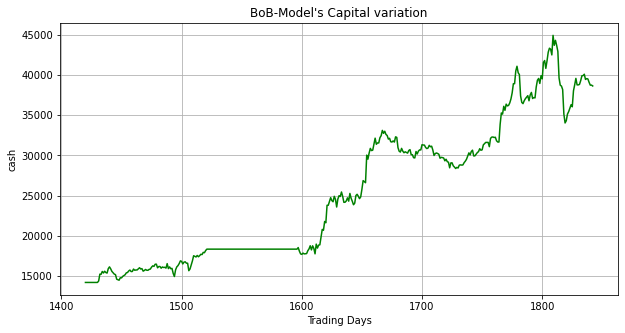

In [11]:
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('pylab', 'inline')
fig = plt.figure()
ax=X.loc[data_length_start:data_length-2,'cash'].plot(grid="True",figsize=(10,5), title="BoB-Model's Capital variation",color="g")
ax.set_xlabel("Trading Days")
ax.set_ylabel("cash")
plt.savefig("IMAGES/BoB-Test.png")
plt.show()
#fig.savefig('baroda_close.png')